# –®–ø–∞—Ä–≥–∞–ª–∫–∞

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats as sts
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True),

%matplotlib inline

## –¢–µ–æ—Ä–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏

### –ö–æ–º–±–∏–Ω–∞—Ç–æ—Ä–∏–∫–∞

**–ë–µ–∑ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π**

_**–ü–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏**_
$$P_n = n!$$

***–°–æ—á–µ—Ç–∞–Ω–∏—è***
$$C_n^m = {n! \over (n-m)! * m!}$$

***–†–∞–∑–º–µ—â–µ–Ω–∏—è***
$$A_n^m = C_n^m * P_m = {n! \over (n-m)!}$$

**C –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è–º–∏**

_**–ü–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏**_
$$P_n = {n! \over n_1!*n_2!*n_3!*...*n_K!}$$

***–°–æ—á–µ—Ç–∞–Ω–∏—è***
$$C_n^m = C_{n+m-1}^m = {(n+m-1)! \over (n-m)! * m!}$$

***–†–∞–∑–º–µ—â–µ–Ω–∏—è***
$$A_n^m = n^m$$

###  –û—Å–Ω–æ–≤—ã

**–°–æ–±—ã—Ç–∏—è**:
1. –°–ª—É—á–∞–π–Ω—ã–µ, –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω—ã–µ, –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ
1. –°–æ–≤–º–µ—Å—Ç–Ω—ã–µ, –Ω–µ—Å–æ–≤–º–µ—Å—Ç–Ω—ã–µ -> –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–µ
1. –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã–µ, –Ω–µ—ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã–µ

**–ê–ª–≥–µ–±—Ä–∞ —Å–æ–±—ã—Ç–∏–π**
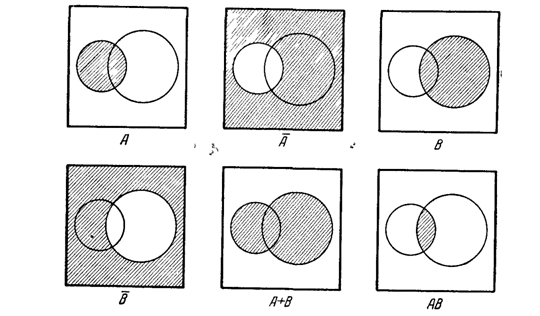
* P(A + B) = P(A) + P(B) - P(AB)
* P(AB) = 

### –¢–µ–æ—Ä–µ–º–∞ –ë–∞–π–µ—Å–∞

## –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞

### –°–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã

Point = -0.90
PDF@point = 0.26717
CDF@point = 0.18527


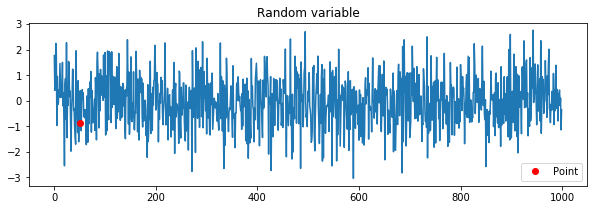

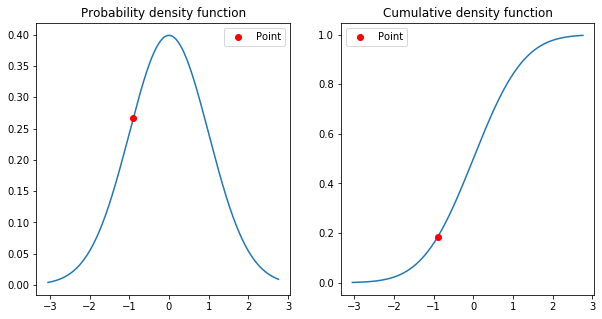

In [9]:
def demonstrateNormalDistibution(size, point_pos=0.05, **kwargs):
    np.random.seed(0)
    norm = sts.norm
    test = norm.rvs(size=size, **kwargs)
    point_pos = int(np.round(size * point_pos))
    point = test[point_pos]
    x = np.linspace(min(test), max(test), len(test))
    print(f'Point = {test[point_pos]:0.2f}')
    print(f'PDF@point = {norm.pdf(point):.5f}\nCDF@point = {norm.cdf(point):.5f}')

    plt.figure(figsize=(10,3))
    plt.title('Random variable')
    plt.plot(test)
    plt.plot(point_pos, point, 'ro', label='Point')
    plt.legend()
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title('Probability density function')
    plt.plot(x, norm.pdf(x))
    plt.plot(point, norm.pdf(point), 'ro', label='Point')
    plt.legend()

    plt.subplot(122)
    plt.title('Cumulative density function')
    plt.plot(x, norm.cdf(x))
    plt.plot(point, norm.cdf(point), 'ro', label='Point')
    plt.legend()
demonstrateNormalDistibution(1000)

### –≠–Ω—Ç—Ä–æ–ø–∏—è

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i}$$

$p_i$ - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ–±–Ω–∞—Ä—É–∂–∏—Ç—å —Å–∏—Å—Ç–µ–º—É –≤ i-–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏

In [81]:
def enthropy(x):
    unq_dict = dict(zip(*(np.unique(x, return_counts=True))))
    s = 0
    for val, count in unq_dict.items():
        p = count/len(x)
        s -= p * np.log2(p)
    return s
a = [1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0]
b = np.hstack(([0]*3, [1]*3, [2]*3))
enthropy(b), np.log2(3)

(1.584962500721156, 1.584962500721156)

### –ü—Ä–∏—Ä–æ—Å—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (Information gain, IG)

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i$$

$S_0$ - —ç–Ω—Ç—Ä–æ–ø–∏—è –≤—ã–±–æ—Ä–∫–∏ –¥–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è

$q$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥—Ä—É–ø–ø –ø–æ—Å–ª–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è 

$N_i$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ i-–π –≥—Ä—É–ø–ø–µ

$S_i$ - —ç–Ω—Ç—Ä–æ–ø–∏—è –≤ –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø–µ


In [93]:
def information_gain(x, thr):
    x_1 = x[:thr]
    x_2 = x[thr:]
    ent_0 = enthropy(x)
    
    ig = ent_0 - len(x_1)/len(x)*enthropy(x_1) - len(x_2)/len(x)*enthropy(x_2)
    return ig
print(f'{information_gain(a, 9):0.7f}')

0.0000736


### –ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å –î–∂–∏–Ω–∏ (Gini impurity)

$$G = 1 - \sum\limits_k (p_k)^2$$

$p_k$ - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å i-–≥–æ –∏—Å—Ö–æ–¥–∞

In [68]:
def gini_impurity(x):
    unq_dict = dict(zip(*(np.unique(x, return_counts=True))))
    gi = 1
    for val, count in unq_dict.items():
        gi -= np.square(count/len(x))
    return gi
gini_impurity(a)

0.49499999999999994

## ML

### –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

### –¢–µ–æ—Ä–∏—è –∂—é—Ä–∏ –ö–æ–Ω–¥–æ—Ä—Å–µ

$$\large \mu = \sum_{i=m}^{N}{N\choose i}p^i(1-p)^{N-i}$$

$N$  is the total number of jurors;

$m$  is a minimal number of jurors that would make a majority, that is $\large m = floor(N/2) + 1$;

$\large {N \choose i}$  is the number of  ùëñ -combinations from a set with  ùëÅ  elements.

$p$  is the probability of the correct decision by a juror;

$¬µ$  is the probability of the correct decision by the whole jury.

In [5]:
from itertools import combinations
combinations

In [14]:
def condorcet(p, n):
    m = n//2+1
    res = 0
    for i in range(m, n+1):
        n_comb = len(list(combinations(range(n), i)))
        res += n_comb * p**i * (1 - p)**(n-i)
        
    return res
condorcet(.8, 7)

0.9666560000000001

## Python

## –ê–ª–≥–æ—Ä–∏—Ç–º—ã

## –ú–∞—Ç–∞–Ω –∏ –ª–∏–Ω–µ–π–Ω–∞—è –∞–ª–≥–µ–±—Ä–∞

### –ò–Ω—Ç–µ–≥—Ä–∞–ª—ã

### –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è

–û—Ç–ø—Ä–∞–≤–ª—è—è—Å—å –≤ –Ω–æ–≤–æ–µ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ, —Ç—Ä–µ–≤–µ–ª–±–ª–æ–≥–µ—Ä—ã –ø–æ—Å—Ç–∞–≤–∏–ª–∏ –Ω–∞ —Å–≤–æ—é –º–∞—à–∏–Ω—É —á–µ—Ç—ã—Ä–µ –Ω–æ–≤—ã–µ —à–∏–Ω—ã –∏ –≤–∑—è–ª–∏ –∑–∞–ø–∞—Å–∫—É. –ö–∞–∫–æ–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–Ω–∏ —Å–º–æ–≥—É—Ç –ø—Ä–æ–µ—Ö–∞—Ç—å, –µ—Å–ª–∏ –∏–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ —à–∏–Ω—ã –Ω–∞ –ø–µ—Ä–µ–¥–Ω–∏—Ö –∫–æ–ª—ë—Å–∞—Ö –ø–æ–ª–Ω–æ—Å—Ç—å—é –∏–∑–Ω–∞—à–∏–≤–∞—é—Ç—Å—è —á–µ—Ä–µ–∑ 45 000 –∫–º, –∞ –Ω–∞ –∑–∞–¥–Ω–∏—Ö ‚Äî —á–µ—Ä–µ–∑ 55 000 –∫–º? –í—Å–µ —à–∏–Ω—ã –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ, –∞ —É—Å–ª–æ–≤–∏—è –ø–æ–µ–∑–¥–∫–∏ –ø–æ–∑–≤–æ–ª—è—é—Ç –∏—Ö –ø–µ—Ä–µ—Å—Ç–∞–≤–ª—è—Ç—å.



x1 = x2 = x3 = x4 = x5

f1 + f1 * rear = x1 

In [10]:
base = 1
rear = 55000 / 45000
rear

1.2222222222222223

In [11]:
f = 45000
r = f * rear
f, r


(45000, 55000.00000000001)

$x = a*f + b*r$

$x = a*f + b * f * rear$

$x = f*(a + b*rear)$

$a + b = 1$

$x = f*(a + (1-a)*rear) = f*(a+rear-a*rear) = f*(a*(1-rear)+rear) = 45000*(a*(1-1.222222) + 1.222222)$

In [15]:
def func(x):
    return 45000*(x*(1-rear) + rear)

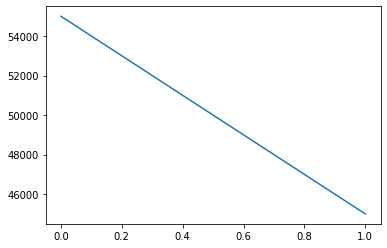

In [16]:
x = np.linspace(0, 1, 100)

plt.plot(x, func(x))

#  –ì–Ω–æ–º–∏–∫–∏

## Skyline
In a 2 dimensional array grid, each value `grid[i][j]` represents the height of a building located there. We are allowed to increase the height of any number of buildings, by any amount (the amounts can be different for different buildings). Height 0 is considered to be a building as well. 

At the end, the "skyline" when viewed from all four directions of the grid, i.e. top, bottom, left, and right, must be the same as the skyline of the original grid. A city's skyline is the outer contour of the rectangles formed by all the buildings when viewed from a distance. See the following example.

What is the maximum total sum that the height of the buildings can be increased?

In [47]:
a = [ [3, 0, 8, 4], 
      [2, 4, 5, 7],
      [9, 2, 6, 3],
      [0, 3, 1, 0] ]

In [93]:
max_col = []
max_row = []
max_col = a[0].copy()
for i in a:
    print(i)
    max_row.append(max(i))
    for n, j in enumerate(i):
        if j > max_col[n]:
            max_col[n] = j
            
for n, i in enumerate(a):
    for m, j in enumerate(i):
        a[m][n] = min(max_col[n], max_row[m])
a


[8, 4, 8, 7]
[7, 4, 7, 7]
[9, 4, 8, 7]
[3, 3, 3, 3]


[[8, 4, 8, 7], [7, 4, 7, 7], [9, 4, 8, 7], [3, 3, 3, 3]]

## –ü–æ–∏—Å–∫ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –º–∞—Å—Å–∏–≤–∞ –≤ –¥—Ä—É–≥–æ–º –º–∞—Å—Å–∏–≤–µ

In [59]:
def find_jewels(J, S):
	set_J = set(J)
	jewels = 0
	for s in S:
		if s in set_J:
			jewels +=1
	return jewels

## –í—ã—è–≤–ª–µ–Ω–∏–µ —Å–∞–º–æ–π –¥–ª–∏–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ –±–∏–Ω–∞—Ä–Ω–æ–º –≤–µ–∫—Ç–æ—Ä–µ

In [92]:
f = open('test.txt')
n = f.readline().strip()
# f = f.read().split()
cur = 0
longest = 0
for i in f:
    if int(i) == 1:
        cur +=1
        longest = max(cur, longest)
    else:
        cur = 0
print(longest)

3


## –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–∞–ª–∏–Ω–¥—Ä–æ–º–Ω–æ—Å—Ç—å

In [2]:
df = pd.DataFrame(np.array([[1, 2], [3, 4]]), columns=['a', 'b'])
df

a  b
0  1  2
1  3  4

In [3]:
sum([ x ** 2 for x in range(5) if x % 2 == 0])

20